Step-1:Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Step-2:Importing the Boston House Price Dataset

In [4]:
from sklearn.datasets import fetch_openml

# The Boston Housing dataset is deprecated in scikit-learn versions 1.2+,
# and the original fetch_california_housing() was erroneously trying to download the Boston dataset's URL.
# To explicitly load the Boston Housing dataset (as implied by the notebook's intent),
# we can fetch it from OpenML.

try:
    # Fetch the Boston dataset from OpenML. 'boston' is available as 'boston' on OpenML.
    boston_data = fetch_openml(name='boston', version=1, as_frame=False, return_X_y=False)
    house_price_dataset = {
        'data': boston_data.data,
        'target': boston_data.target,
        'feature_names': boston_data.feature_names,
        'DESCR': boston_data.DESCR
    }
    print("Boston Housing dataset loaded successfully from OpenML.")
except Exception as e:
    print(f"Error loading Boston Housing dataset from OpenML: {e}")
    print("Please ensure you have an active internet connection or try a different method to load the dataset.")
    house_price_dataset = None # Assign None or handle error as appropriate

Boston Housing dataset loaded successfully from OpenML.


In [5]:
print(house_price_dataset)

{'data': array([[0.00632, 18.0, 2.31, ..., 15.3, 396.9, 4.98],
       [0.02731, 0.0, 7.07, ..., 17.8, 396.9, 9.14],
       [0.02729, 0.0, 7.07, ..., 17.8, 392.83, 4.03],
       ...,
       [0.06076, 0.0, 11.93, ..., 21.0, 396.9, 5.64],
       [0.10959, 0.0, 11.93, ..., 21.0, 393.45, 6.48],
       [0.04741, 0.0, 11.93, ..., 21.0, 396.9, 7.88]], dtype=object), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20

In [7]:
# Loading the dataset to a Pandas DataFrame
house_price_dataframe = pd.DataFrame(house_price_dataset['data'], columns = house_price_dataset['feature_names'])

In [ ]:
# Print First 5 rows of our DataFrame
house_price_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
# add the target (price) column to the DataFrame
house_price_dataframe['price'] = house_price_dataset['target']

In [ ]:
house_price_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
# checking the number of rows and Columns in the data frame
house_price_dataframe.shape

(506, 14)

In [11]:
# check for missing values
house_price_dataframe.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [12]:
# statistical measures of the dataset
house_price_dataframe.describe()

,price
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


Understanding the correlation between various features in the dataset

1. Positive Correlation

2. Negative Correlation

In [13]:
correlation = house_price_dataframe.corr()

<Axes: >

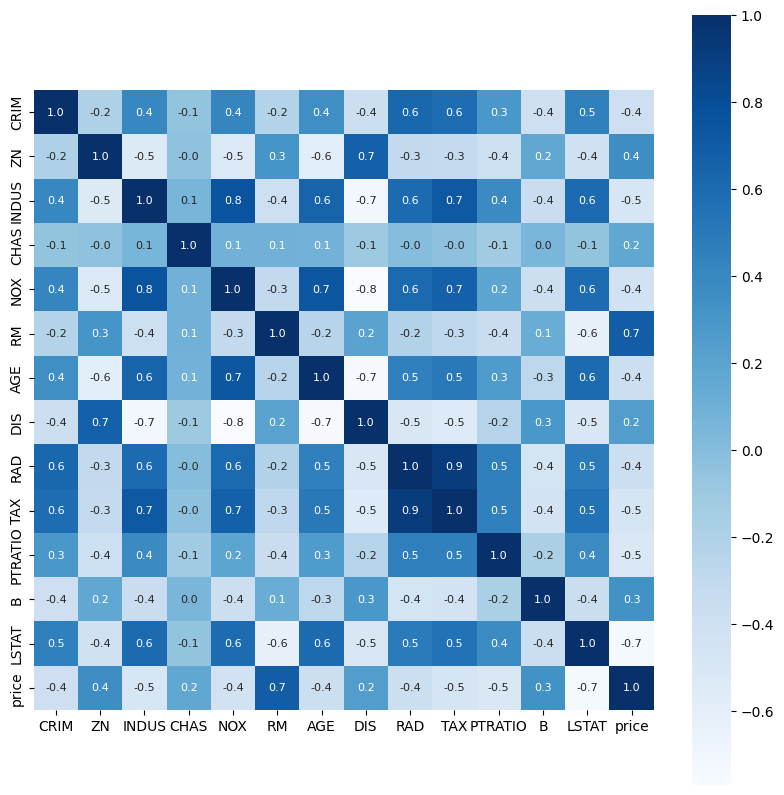

In [14]:
# constructing a heatmap to nderstand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

Step-3:Splitting the data and Target

In [15]:
X = house_price_dataframe.drop(['price'], axis=1)
Y = house_price_dataframe['price']

In [16]:
print(X)
print(Y)

        CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX PTRATIO  \
0    0.00632  18.0   2.31    0  0.538  6.575  65.2    4.09   1  296.0    15.3   
1    0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0    17.8   
2    0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0    17.8   
3    0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0    18.7   
4    0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0    18.7   
..       ...   ...    ...  ...    ...    ...   ...     ...  ..    ...     ...   
501  0.06263   0.0  11.93    0  0.573  6.593  69.1  2.4786   1  273.0    21.0   
502  0.04527   0.0  11.93    0  0.573   6.12  76.7  2.2875   1  273.0    21.0   
503  0.06076   0.0  11.93    0  0.573  6.976  91.0  2.1675   1  273.0    21.0   
504  0.10959   0.0  11.93    0  0.573  6.794  89.3  2.3889   1  273.0    21.0   
505  0.04741   0.0  11.93    0  0.573   6.03  80.8   2.505   1  273.0    21.0   

          B LSTAT  
0     3

Step-4:Splitting the data into Training data and Test data

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [18]:
print(X.shape, X_train.shape, X_test.shape)

(506, 13) (404, 13) (102, 13)


Step-5:Model Training

XGBoost Regressor

In [19]:
# loading the model
model = XGBRegressor()

In [21]:
# training the model with X_train
# Convert X_train columns to numeric before training
X_train_numeric = X_train.apply(pd.to_numeric, errors='coerce')
model.fit(X_train_numeric, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

Step-6:Model Evaluation

Prediction on training data

In [23]:
# accuracy for prediction on training data
training_data_prediction = model.predict(X_train_numeric)

In [24]:
print(training_data_prediction)

[23.112196  20.992601  20.10438   34.67932   13.920501  13.499354
 21.998383  15.206723  10.89543   22.67402   13.795236   5.602332
 29.808502  49.98666   34.89634   20.594336  23.388903  19.2118
 32.69294   19.604128  26.978151   8.405952  46.00062   21.70406
 27.084402  19.372278  19.297894  24.79984   22.608278  31.707775
 18.53683    8.703393  17.40025   23.698814  13.29729   10.504759
 12.693588  24.994888  19.694864  14.911037  24.20254   24.991112
 14.901547  16.987965  15.592753  12.704759  24.505623  15.007718
 49.999355  17.509344  21.18844   31.999287  15.606071  22.902134
 19.309835  18.697083  23.302961  37.19767   30.102247  33.117855
 20.993683  50.00471   13.40048    5.002565  16.50862    8.4016905
 28.651423  19.49218   20.595366  45.404697  39.808857  33.4055
 19.81498   33.406376  25.30206   49.998615  12.544487  17.433802
 18.602612  22.601418  50.004013  23.814182  23.313164  23.097467
 41.71243   16.112017  31.604454  36.09397    7.0009975 20.406271
 19.992195  12

In [25]:
# R squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9999980039471451
Mean Absolute Error :  0.0091330346494618


Visualizing the actual Prices and predicted prices

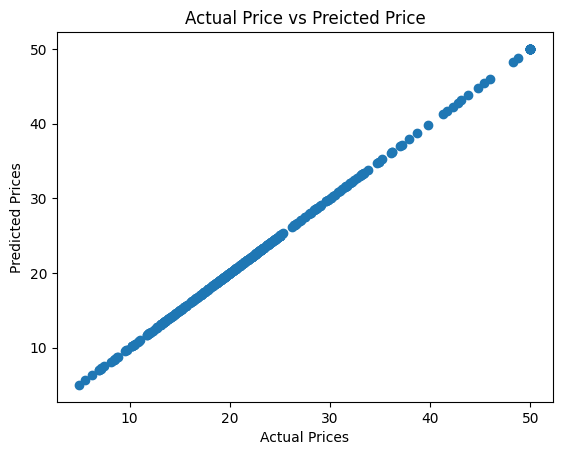

In [26]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

Prediction on Test Data

In [29]:
# accuracy for prediction on test data
# Convert X_test columns to numeric for prediction
X_test_numeric = X_test.apply(pd.to_numeric, errors='coerce')
test_data_prediction = model.predict(X_test_numeric)

In [30]:
# R squared error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9051721149855378
Mean Absolute Error :  2.0748727686264927
